## Homework 2

#### Preparation

Some initializations are necessary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Apartment prices

Before we read data from file, it is neccessary to check the data. Opening the file in Jupyter shows:

![Upper left corner of the file opened in Jupyter](Booli_sold-csv.jpg  "'Delimiter' shows the sep parameter value to use")<br><br>

We see that the delimiter is comma, " , ", and the numbers are integers. The default read method may thus be used, since we do not have to pass any arguments for delimiter or decimal character.<br><br>Reading data from file into dataframe is now done.

In [2]:
apartments_df = pd.read_csv('Booli_sold.csv')

To see some more data than above

In [3]:
apartments_df.tail()

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
153,1495000,1388.0,26.0,1.0,2012-10-20 07:36:37,1935.0,Lägenhet,1297784,2012-11-30,1475000,...,59.372272,18.055659,True,Stockholm,Stockholms län,101,Notar,1566,Broker,http://www.notar.se/
154,2245000,2455.0,50.0,2.0,2012-10-19 15:32:58,1935.0,Lägenhet,1296874,2012-10-27,2245000,...,59.372272,18.055659,True,Stockholm,Stockholms län,101,Notar,1566,Broker,http://www.notar.se/
155,1450000,1072.0,23.0,1.0,2012-09-14 05:10:08,1936.0,Lägenhet,1270599,2012-10-22,1450000,...,59.371194,18.053552,NaN,Stockholm,Stockholms län,255,Notar,1566,Broker,http://www.notar.se/
156,2495000,2748.0,56.0,3.0,2012-09-21 12:19:37,1935.0,Lägenhet,1276232,2012-10-09,2200000,...,59.372759,18.054634,True,Stockholm,Stockholms län,70,Notar,1566,Broker,http://www.notar.se/
157,2300000,2455.0,50.0,2.0,2012-09-16 02:33:35,1935.0,Lägenhet,1272477,2012-10-09,2180000,...,59.372272,18.055659,True,Stockholm,Stockholms län,101,Notar,1566,Broker,http://www.notar.se/


<br>

#### 1. Price per Square Meter<br>
    

Before computing a new variable, ppsqm, it is important to see e.g. data types, id numbers and names for the columns. We must know if a division of soldPrice by livingArea is possible without a conversion of data type.

In [4]:
apartments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listPrice                         158 non-null    int64  
 1   rent                              156 non-null    float64
 2   livingArea                        157 non-null    float64
 3   rooms                             157 non-null    float64
 4   published                         158 non-null    object 
 5   constructionYear                  144 non-null    float64
 6   objectType                        158 non-null    object 
 7   booliId                           158 non-null    int64  
 8   soldDate                          158 non-null    object 
 9   soldPrice                         158 non-null    int64  
 10  soldPriceSource                   158 non-null    object 
 11  url                               158 non-null    object 
 12  floor   

<br>
We see that both soldPrice and livingArea have numeric data types, so there is no need for a conversion.
The new variable, ppsqm, is computed and placed as the fourth column in the data frame. Values are rounded to two decimal places.

In [5]:
#apartments_extended_df = apartments_df.insert(3,'ppSqm',round(apartments_df['listPrice'] / apartments_df['livingArea'], 2 ))
# apartments_df.insert(3,'ppSqm',round(apartments_df['listPrice'] / apartments_df['livingArea'], 2 ))
apartments_df.insert(3,'ppsqm',round(apartments_df['soldPrice'] / apartments_df['livingArea'], 2 ))

We also see that there are 26 columns, not all of them are interesting. Consequently, we can choose a few of them to investigate closer.

In [6]:
interesting_apartments_columns = ['listPrice', 'rent', 'livingArea', 'ppsqm', 'rooms', 'soldDate', 'soldPrice', 'floor', 'additionalArea']

The first five apartments are:

In [7]:
apartments_df[interesting_apartments_columns].head()

,listPrice,rent,livingArea,ppsqm,rooms,soldDate,soldPrice,floor,additionalArea
0,3995000,4467.0,73.0,52328.77,3.0,2018-11-08,3820000,NaN,NaN
1,1995000,1773.0,36.0,65416.67,1.0,2018-10-19,2355000,1.0,0.0
2,5100000,3839.0,81.0,75432.10,3.0,2018-09-27,6110000,3.0,0.0
3,5495000,4483.0,107.0,75233.64,4.0,2018-09-06,8050000,3.0,0.0
4,1995000,1696.0,29.0,82758.62,1.0,2018-06-18,2400000,3.0,NaN



#### 2. Five most expensive apartments w.r.t. ppsqm


In [8]:
# apartments_df.sort_values(by='ppSqm')

[Show the five highest values, avoiding NaN value]: #

In [9]:
# apartments_df.sort_values(by='ppSqm', na_position='first').tail()

There are several ways to find the most expensive apartments, e.g. sort descending and then show the top five apartments. There is also a function that does this directly:

In [10]:
apartments_df[interesting_apartments_columns].nlargest(5,'ppsqm')

,listPrice,rent,livingArea,ppsqm,rooms,soldDate,soldPrice,floor,additionalArea
67,1595000,1464.0,24.0,104166.67,1.0,2016-01-21,2500000,3.0,NaN
50,1890000,1464.0,24.0,102083.33,1.0,2016-06-21,2450000,3.0,NaN
54,1795000,1374.0,23.0,100000.00,1.0,2016-04-28,2300000,1.0,NaN
34,1750000,1144.0,25.0,88400.00,1.0,2017-06-01,2210000,0.0,0.0
55,1895000,1522.0,26.9,85501.86,1.0,2016-04-19,2300000,2.0,NaN



#### 3. Average ppsqm


The average price per square meter is found as:

In [11]:
average = apartments_df['ppsqm'].mean()

In [12]:
print("\n The average price in Ekhagen is " + str(round(average,2)) + " SEK per square meter. \n \n")


 The average price in Ekhagen is 58759.38 SEK per square meter. 
 




#### 4. Interesting to see the correlation between price per square meter and living area


It is often said that there is a negative correlation between price per square meter and living area of an apartment. It would be interesting to see if this is valid also for apartments in Ekhagen. 
                                                                                                                                                                          
One way to study this is to make a scatter plot of price per square meter versus living area.                                                                                                                                                                          .

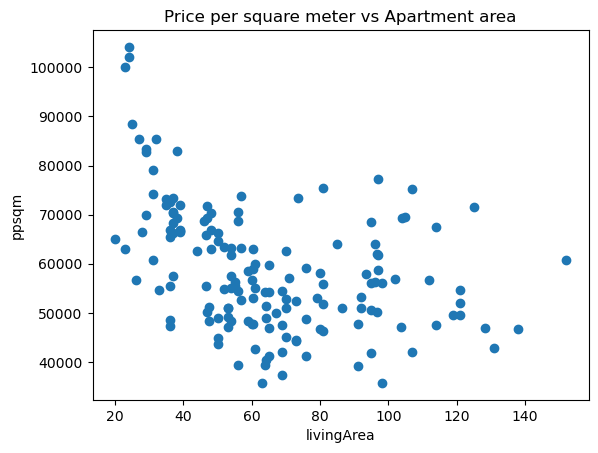

In [13]:
fig, ax = plt.subplots()
# livingArea_asArray = np.asarray(apartments_df['livingArea'])
# ppsqm_asArray = np.asarray(apartments_df['ppsqm'])
#ax.plot = (livingArea_asArray,ppSqm_asArray)
ax.set_title('Price per square meter vs Apartment area')
ax.set_xlabel('livingArea')
ax.set_ylabel('ppsqm')
ax.scatter('livingArea','ppsqm',data=apartments_df);
# ax.scatter(apartments_df['livingArea'],apartments_df['ppSqm'])
# ax.scatter(livingArea_asArray,ppSqm_asArray)
# plt.show()

<br>
The overall impression from the plot is that there is a weak negative correlation. If you divide the living area in two bins, you get a more detailed view.
It seems that for apartments with a living area less than 70 square meter there in fact is a negative linear correlation, but for larger apartments it is hard to find any correlation at all.

To study if this impression holds you can compute the correlation coefficient, R, for the whole data set, and for the two subsets mentioned above.

First we make a new data frame with the two columns:

In [14]:
livingArea_ppsqm_df = pd.DataFrame(data=apartments_df,columns=['livingArea','ppsqm'])

In [15]:
livingArea_ppsqm_df.head()

,livingArea,ppsqm
0,73.0,52328.77
1,36.0,65416.67
2,81.0,75432.10
3,107.0,75233.64
4,29.0,82758.62


We then compute R for the whole data set.

In [16]:
round(livingArea_ppsqm_df.corr(),3)

,livingArea,ppsqm
livingArea,1.000,-0.408
ppsqm,-0.408,1.000


There is a small negative linear correlation between living area and price per square meter.

[Ta bort rader med NaN, blir ingen skillnad i R, eftersom corr() tar bort NaN !!]: #

For apartments up to 70 square meters R is:

In [17]:
round(livingArea_ppsqm_df.where(livingArea_ppsqm_df['livingArea'] < 70).corr(),3)

,livingArea,ppsqm
livingArea,1.000,-0.701
ppsqm,-0.701,1.000


This confirms the visual impression of a larger correlation for apartments less than 70 square meters.

For larger apartments we get:

In [18]:
round(livingArea_ppsqm_df.where(livingArea_ppsqm_df['livingArea'] >= 70).corr(),3)

,livingArea,ppsqm
livingArea,1.000,0.046
ppsqm,0.046,1.000


So, for larger apartments living area and price per square meter are uncorrelated in the studied data set.

In [19]:
# livingArea_ppSqm_df_without_NaN  = livingArea_ppsqm_df.dropna(ignore_index=True) 

In [20]:
# livingArea_ppSqm_df_without_NaN

In [21]:
# livingArea_ppsqm_df_without_NaN.corr()

In [22]:
# To investigate the subsets we first divide the data in two data frames

In [23]:
# livingArea_ppsqm_df_lt_70_sqm_with_NaN = livingArea_ppsqm_df.where(livingArea_ppsqm_df['livingArea'] < 70).corr()

In [24]:
# livingArea_ppsqm_df_lt_70_sqm_with_NaN

In [25]:
# livingArea_ppsqm_df_lt_70_sqm_without_NaN = livingArea_ppsqm_df_lt_70_sqm_with_NaN.dropna()

In [26]:
# round(livingArea_ppsqm_df_lt_70_sqm_without_NaN.corr(),3)

In [27]:
# livingArea_ppsqm_df_gte_70_sqm = livingArea_ppsqm_df.where(livingArea_ppsqm_df['livingArea'] >= 70).dropna()

In [28]:
# livingArea_ppsqm_df_gte_70_sqm

In [29]:
# round(livingArea_ppsqm_df_gte_70_sqm.corr(),3)

In [30]:
# Gör en matris av de två arrayerna, blir komplicerat med NaN-värdeparen (1 eller 2 sådana par)

In [31]:
# livingArea_ppSqm_matrix = np.asmatrix([livingArea_asArray,ppSqm_asArray])

In [32]:
# livingArea_ppSqm_matrix.ndim

In [33]:
# livingArea_ppSqm_matrix.shape

In [34]:
# livingArea_ppSqm_matrix.strides # 8*158 = 1264

In [35]:
# en_obs = livingArea_ppSqm_matrix[1][0]

In [36]:
# type(en_obs)

In [37]:
# print(en_obs)

In [38]:
# en_obs.ndim

In [39]:
# print(en_obs[0,4])

In [40]:
# en_obs.shape

In [41]:
# tvaa_obs = livingArea_ppSqm_matrix[...,157]

In [42]:
# type(tvaa_obs)

In [43]:
# tvaa_obs.ndim

In [44]:
# tvaa_obs.shape

In [45]:
# tvaa_obs

In [46]:
# livingArea_ppSqm_matrix

In [47]:
# np.corrcoef(livingArea_asArray,ppSqm_asArray)

In [48]:
# apartments_df['livingArea','ppSqm'].corr(method='callable')
# np.corrcoef(livingArea_ppSqm_matrix)

In [49]:
# ivingArea_asArray 

In [50]:
# type(livingArea_asArray)

In [51]:
# livingArea_asArray.ndim

In [52]:
# ppSqm_asArray


### The Swedish Election of 2018


As above, we have to check the data before reading it.

![Upper left corner of the file opened in Jupyter](2018_R_per_kommun-csv-II.jpg  "'Delimiter' shows the sep parameter value to use")<br><br>

To read data from file, it is to be noted that the delimiter is semi colon, " ; ", so the correct value for the sep parameter must be used. We also see that comma, " , ", is used as decimal character, which has to be given for the corresponding parameter.<br>

In [53]:
R_per_kommun_df = pd.read_csv('2018_R_per_kommun.csv', sep=';', decimal=',')

To see some more data

In [54]:
R_per_kommun_df.tail()

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
285,25,80,Norrbottens län,Luleå,15.38,7.53,4.37,4.78,38.97,10.47,...,NaN,NaN,0.01,0.03,0.69,0.04,53182,53589,60185,89.04
286,25,81,Norrbottens län,Piteå,11.82,7.49,2.52,4.80,47.48,10.56,...,NaN,NaN,0.00,0.03,0.61,0.02,29523,29719,33094,89.80
287,25,82,Norrbottens län,Boden,14.32,6.23,3.61,4.61,41.76,8.10,...,NaN,NaN,0.02,0.03,0.84,0.07,19110,19291,21934,87.95
288,25,83,Norrbottens län,Haparanda,12.79,9.61,1.86,5.32,36.69,5.91,...,NaN,NaN,NaN,0.04,1.01,0.11,4402,4454,6120,72.78
289,25,84,Norrbottens län,Kiruna,10.71,5.38,2.51,4.91,38.23,13.46,...,NaN,0.05,0.02,0.16,1.09,0.05,14796,14991,17468,85.82


<br>
To get some info on the data frame structure


In [55]:
R_per_kommun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LÄNSKOD          290 non-null    int64  
 1   KOMMUNKOD        290 non-null    int64  
 2   LÄNSNAMN         290 non-null    object 
 3   KOMMUNNAMN       290 non-null    object 
 4   M                290 non-null    float64
 5   C                290 non-null    float64
 6   L                290 non-null    float64
 7   KD               290 non-null    float64
 8   S                290 non-null    float64
 9   V                290 non-null    float64
 10  MP               290 non-null    float64
 11  SD               290 non-null    float64
 12  FI               290 non-null    float64
 13  AfS              290 non-null    float64
 14  BASIP            144 non-null    float64
 15  CSIS             10 non-null     float64
 16  DD               283 non-null    float64
 17  DjuP            

<br>
We have 44 columns, only some of them are interesting for our investigation. As before, choose these columns.

In [56]:
# interesting_election_columns = ['LÄNSKOD', 'KOMMUNKOD', 'LÄNSNAMN', 'KOMMUNNAMN', 'M', 'C', 'L', 'KD', 'S', 'V', 'MP', 'SD', 'FI', 'AfS', 'RÖSTER GILTIGA', 'VALDELTAGANDE']

In [57]:
interesting_election_columns = ['LÄNSKOD', 'LÄNSNAMN', 'KOMMUNNAMN', 'M', 'C', 'L', 'KD', 'S', 'V', 'MP', 'SD', 'FI', 'AfS', 'RÖSTER GILTIGA', 'VALDELTAGANDE']


#### 1. Total Number of Legitimate Votes<br>

We have to select the municipalities in the Stockholm region and then sum all "Röster giltiga" in these municipalities.

For each municipality in Sweden, check if it is located in the Stockholm region.

In [58]:
municipalities_in_Stockholm = R_per_kommun_df[interesting_election_columns].loc[R_per_kommun_df.loc[:,'LÄNSKOD'] == 1]

In [59]:
municipalities_in_Stockholm

,LÄNSKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,MP,SD,FI,AfS,RÖSTER GILTIGA,VALDELTAGANDE
0,1,Stockholms län,Upplands Väsby,23.11,6.26,5.66,6.71,26.97,8.01,3.92,18.04,0.37,0.31,25830,84.70
1,1,Stockholms län,Vallentuna,28.29,10.11,7.73,7.58,18.91,4.47,4.85,16.63,0.27,0.37,20952,90.02
2,1,Stockholms län,Österåker,29.68,9.35,7.48,7.13,19.71,4.97,4.44,16.09,0.30,0.27,27711,89.26
3,1,Stockholms län,Värmdö,27.49,9.76,6.40,5.89,20.48,6.02,5.41,17.19,0.36,0.29,28115,90.32
4,1,Stockholms län,Järfälla,23.96,6.31,6.04,6.29,27.68,8.75,4.54,15.00,0.34,0.33,45654,86.32
5,1,Stockholms län,Ekerö,28.12,11.24,7.64,7.85,17.17,4.76,5.70,16.21,0.34,0.35,17814,92.16
6,1,Stockholms län,Huddinge,24.07,7.52,6.14,5.35,26.10,8.63,5.32,15.17,0.49,0.42,61440,84.94
7,1,Stockholms län,Botkyrka,18.52,5.19,4.39,8.13,32.34,9.85,3.85,16.05,0.44,0.27,45393,78.24
8,1,Stockholms län,Salem,24.84,7.61,7.58,7.98,23.07,5.98,4.48,16.88,0.32,0.31,9985,87.81
9,1,Stockholms län,Haninge,22.94,6.06,5.11,5.36,27.29,7.99,3.71,19.89,0.38,0.45,50484,85.06


In [60]:
# is_municipality_in_Stockholm = R_per_kommun_df.loc[:, 'LÄNSKOD'] == 1

In [61]:
# The result is a Series of bool.

In [62]:
# is_municipality_in_Stockholm 

In [63]:
# type(is_municipality_in_Stockholm)

In [64]:
# his Series may be used to select the subset of the data frame that represents municipalities in Stockholm

In [65]:
# municipalities_in_Stockholm = R_per_kommun_df.loc[is_municipality_in_Stockholm]

In [66]:
# municipalities_in_Stockholm

Now, the number of valid votes may be computed by summing the numbers in the column "RÖSTER GILTIGA".

In [67]:
# valid_votes = municipalities_in_Stockholm.iloc[:,41].sum()

In [68]:
valid_votes = municipalities_in_Stockholm.loc[:,'RÖSTER GILTIGA'].sum()

To make the number of valid votes more readable we can have a space as thousands separator. Accomplishing this may be done in two steps, first inserting one of the default separators and then replacing this with a space.

In [69]:
print("{:,}".format(valid_votes).replace(',',' '))

1 426 237


In [70]:
# Another way to compute this number is 

In [71]:
# validVotesAlt = municipalities_in_Stockholm.loc[:, "RÖSTER GILTIGA"].sum()

In [72]:
# print(validVotesAlt)


#### 2. In Which Municipality did the Social Democratic Party Get the Highest Voting Percent?<Br>


First we sort all municipalities in descending order by the percent of votes for the social democratic party, and show top 5.

In [73]:
R_per_kommun_df[interesting_election_columns].sort_values(by="S",ascending=False).head()

,LÄNSKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,MP,SD,FI,AfS,RÖSTER GILTIGA,VALDELTAGANDE
188,17,Värmlands län,Munkfors,8.33,8.12,2.91,3.93,52.18,6.11,1.37,15.43,0.64,0.51,2340,85.13
286,25,Norrbottens län,Piteå,11.82,7.49,2.52,4.80,47.48,10.56,2.42,11.81,0.40,0.20,29523,89.80
196,17,Värmlands län,Hagfors,9.27,7.86,2.33,4.51,47.46,8.27,1.34,18.00,0.24,0.22,7607,84.09
279,25,Norrbottens län,Överkalix,7.81,8.79,2.10,3.44,46.68,10.49,1.07,18.34,0.22,0.40,2241,85.11
280,25,Norrbottens län,Kalix,11.71,6.42,2.87,3.58,45.37,7.88,2.79,18.37,0.24,0.25,10971,87.04


We then choose the name of the first municipality

In [74]:
municipality_highest_voting_percent = R_per_kommun_df[interesting_election_columns].sort_values(by="S",ascending=False).iloc[0,2]

In [75]:
print("\n In " + str(municipality_highest_voting_percent) + " the Social Democratic Party got the highest voting percent, with "+ str(R_per_kommun_df['S'].max()) + " percent. \n")


 In Munkfors the Social Democratic Party got the highest voting percent, with 52.18 percent. 




#### 3. Top 3 Municipalities on Highest Participation


In [76]:
# top_three_participation = R_per_kommun_df.sort_values(by="VALDELTAGANDE",ascending=False).iloc[0:3,[3,44]]

We can get the top three municipalities by sorting descending on the column VALDELTAGANDE, and then choosing the three first rows and the two interesting columns.

In [77]:
top_three_participation = R_per_kommun_df[interesting_election_columns].sort_values(by="VALDELTAGANDE",ascending=False).iloc[0:3,[2,14]]

In [78]:
top_three_participation

,KOMMUNNAMN,VALDELTAGANDE
103,Lomma,93.86
59,Habo,93.35
98,Vellinge,93.13


The index labels are not interesting, so we replace them with spaces.

In [79]:
top_three_participation_alt = top_three_participation

In [80]:
# top_three_participation_alt = top_three_participation.index = ["","",""]

In [81]:
top_three_participation_alt.index = ["","",""]

In [82]:
top_three_participation_alt

,KOMMUNNAMN,VALDELTAGANDE
,Lomma,93.86
,Habo,93.35
,Vellinge,93.13


In [83]:
# def blank_index(x):
#    """ 
#    to replace index labels with space
#    """
#    return " "

In [84]:
# top_three_participation.index.map(blank_index)

In [85]:
# top_three_participation.index = top_three_participation.index.map(blank_index)

In [86]:
# top_three_participation

In [87]:
# R_per_kommun_df.sort_values(by="VALDELTAGANDE",ascending=False).iloc[0:3,[3,44]].values

In [88]:
# print(R_per_kommun_df.sort_values(by="VALDELTAGANDE",ascending=False).iloc[0:3,[3,44]].values)

In [89]:
# R_per_kommun_df.sort_values(by="VALDELTAGANDE",ascending=False).iloc[0:3,:]


### Predicting Strokes


> Läs in data från filen ... i en data frame

To read data from file, it is to be noted that the delimiter is comma, " , ", so the default method may be used.<br><br>

![Upper left corner of the file opened in Jupyter](stroke-data-csv-wider.jpg  "'Delimiter' shows the sep parameter value to use")<br><br>

In [90]:
stroke_data_df = pd.read_csv('stroke-data.csv')

In [91]:
stroke_data_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [92]:
stroke_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


##### An Interesting Conclusion From the Data

> undersök tex samband mellan ålder och stroke, och mellan ålder, en variabel till ( tex blodtryck, diabetes, rökning) och stroke. visa i en plot

make plot wider, to täcka hela bredden, slumpa ett värde i höjdled, +-0.1 tex, ta bara med stroke=1

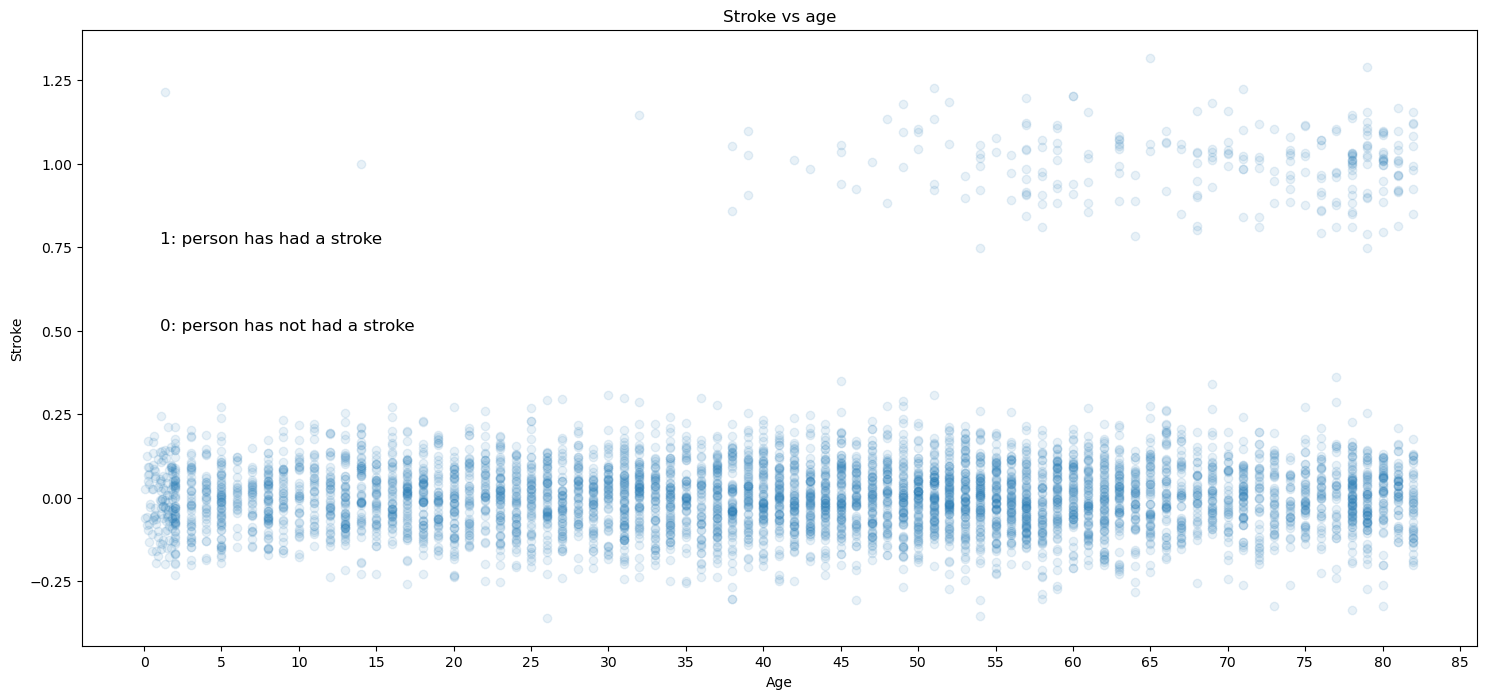

In [93]:
#plt.rcParams['text.usetex'] = True   # to be able to use LaTex

fig, ax = plt.subplots(figsize=(18,8))
# livingArea_asArray = np.asarray(apartments_df['livingArea'])
# ppSqm_asArray = np.asarray(apartments_df['ppSqm'])
#ax.plot = (livingArea_asArray,ppSqm_asArray)
#ax.scatter(livingArea_asArray,ppSqm_asArray)
ax.set_title('Stroke vs age')
ax.set_ylabel('Stroke')
ax.set_xlabel('Age')
# ax.legend("Stroke: 1 +- 3 s.d. i.e. 0.75 ... 1,25", "No stroke: 0 +- 3 s.d. i.e. -0.25 ... 0,25", loc=(0.2, 0.5))
ax.set_xticks(np.arange(0,90,5))
rng = np.random.default_rng()
noisy_stroke = np.asarray(stroke_data_df['stroke']) + 0.1 * rng.standard_normal(5110)  
ax.scatter(np.asarray(stroke_data_df['age']),noisy_stroke, alpha=0.1);
ax.text(1, 0.5,'1: person has had a stroke \n \n \n \n \n0: person has not had a stroke ',fontsize=12);
# ax.scatter(np.asarray(stroke_data_df['age']),np.asarray(stroke_data_df['stroke']) + , alpha=0.1)
# ax.scatter('age', 'stroke', data= stroke_data_df, alpha=0.1)
# plt.show()
#plt.rcParams['text.usetex'] = False   # to be able to not use LaTex